In [ ]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
import re
from bs4 import BeautifulSoup



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/AIML')

In [ ]:
#Read input excel sheet

df = pd.read_excel("input_data.xlsx", sheet_name=None)

In [ ]:
#Get the dataframe from first sheet

dfn = df['Sheet1']

In [ ]:
#Lets see head of the dataframe

dfn.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
#Shape of the dataframe

dfn.shape

(8500, 4)

In [ ]:
#Check data types

dfn.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [ ]:
#Check for blanks

dfn.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
#We are more interested in Description column as it clearly looks like superset of short description
#So lets see that row with blank value for Description

dfn[dfn['Description'].isna()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
#Lets fill the description value above with what we have for short description

dfn.iloc[4395, dfn.columns.get_loc('Description')] = dfn.iloc[4395, dfn.columns.get_loc('Short description')]

In [ ]:
#Lets check for nulls

dfn.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
dtype: int64

We will be using Description column data for training, so we can ignore Short description and Caller

In [ ]:
dfn = dfn.drop(['Short description'], axis=1)
dfn = dfn.drop(['Caller'], axis=1)

In [ ]:
#We noticed there are so many unwanted sequences in Description column
#Lets get rid of those

dfn["Description"] = dfn["Description"].astype(str) 
dfn = dfn.replace('\r\n','', regex=True)

In [ ]:
#Remove Date and time from description

dfn["Description"] = dfn["Description"].replace('\d{2}/\d{2}/\d{4} \d{2}:\d{2}:\d{2}','', regex=True)

In [ ]:
#Remove html characters if any

def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

dfn['Description'] = dfn['Description'].apply(lambda x: strip_html_tags(x))

In [ ]:
pip install unidecode

In [ ]:
#Remove Accented Characters if any
import unidecode

def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

dfn['Description'] = dfn['Description'].apply(lambda x: remove_accented_chars(x))

In [ ]:
pip install -U nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.5)


In [ ]:
#Filter out punctuations

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


def filter_punctuations(text):
    tokens = word_tokenize(text)
    # remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    return ' '.join(words)

dfn['Description'] = dfn['Description'].apply(lambda x: filter_punctuations(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Lowercase the description

dfn['Description'] = dfn['Description'].apply(lambda x: x.lower())

In [ ]:
#Remove digits and word containing digits

dfn['Description'] = dfn['Description'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
#Expand Contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

dfn['Description'] = dfn['Description'].apply(lambda x:expand_contractions(x))

In [ ]:
#Filter out stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def filter_stopwords(text):
    tokens = word_tokenize(text)
    # remove all tokens that are stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in tokens if not w in stop_words]
    return ' '.join(words)

dfn['Description'] = dfn['Description'].apply(lambda x: filter_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmatization

import spacy

# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

dfn['lemmatized'] = dfn['Description'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x))]))


In [ ]:
#Check and remove empty rows after lemmatization

print(dfn.shape)
dfn = dfn[dfn['lemmatized'] != '']
print(dfn.shape)

(8500, 3)
(8430, 3)


In [ ]:
#Lets group the lemmatized descriptions based on assignment groups

df_grouped = dfn[['Assignment group','lemmatized']].groupby(by='Assignment group').agg(lambda x:' '.join(x))
df_grouped.head(20)

,lemmatized
Assignment group,
GRP_0,user details employee manager name user name a...
GRP_1,event critical value mountpoint threshold toda...
GRP_10,receive fail receive fail receive fail receive...
GRP_11,hello service nee monitor manufacture drawing ...
GRP_12,c label server space consume space available g...
GRP_13,receive fail receive two customer account get ...
GRP_14,intermittent service configair server require ...
GRP_15,hi channel partner email address djhadkudhd re...
GRP_16,receive cid bwfhtumx japznrvb regional control...


In [ ]:
# Lets create Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['lemmatized'])

df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head(10)

,aa,aaa,aaeur,aao,aaymanncustom,ab,abandon,abap,abarbeiten,abc,abca,abcdegy,abcdri,abd,abdhtyu,abend,abende,abended,aber,abertura,abfragetimeout,abgebildet,abgebrochen,abgelaufen,abgeschlossen,abgesprochen,abgrtyreu,abhanden,abhandengekommen,abhay,abhilfe,abholen,abholung,ability,abl,able,abmelden,abode,abort,abovementione,...,zugang,zugordnet,zugriff,zugriffe,zugriffs,zugriffsrechte,zuhause,zuhoylts,zukommen,zulassen,zum,zumindest,zuothryrt,zur,zura,zurtxjbd,zurzeit,zusammen,zuschaltung,zusta,zuteillisten,zuvjqgwa,zuvor,zuyimtsf,zvjxuahe,zvmesjpt,zvnxlobq,zvnxlobqdirecteur,zvygmnco,zwar,zwei,zweites,zwip,zwischen,zwrypjqv,zwutmehy,zwwirep,zxdtskpw,zyjfpgtk,zz
Assignment group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GRP_0,0,2,0,0,1,1,0,2,0,1,0,0,1,1,2,0,0,0,7,0,0,0,1,0,1,0,1,1,0,0,2,0,0,1,1,266,0,0,0,0,...,1,0,18,1,1,0,1,1,0,0,3,0,1,1,8,0,1,4,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0
GRP_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
GRP_12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,9,0,0,0,0,...,0,0,7,0,0,1,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_13,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_14,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


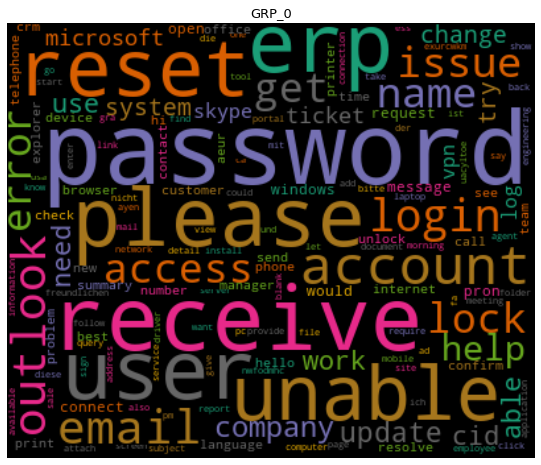

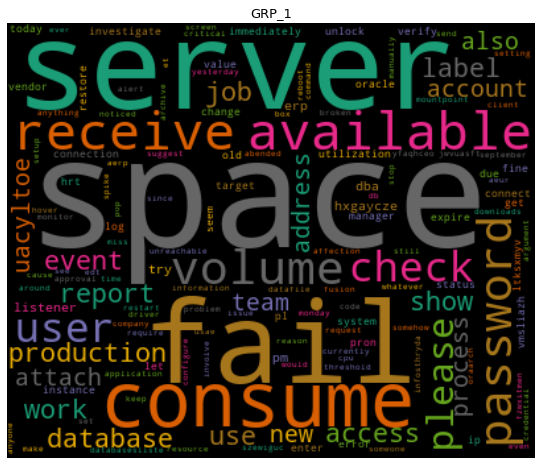

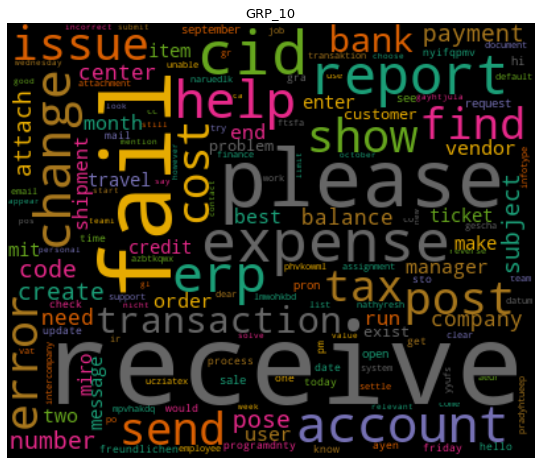

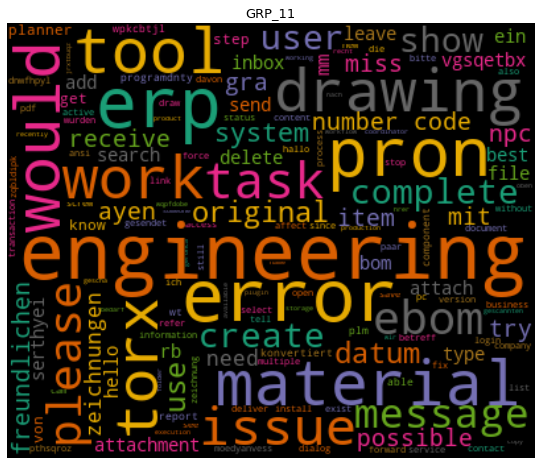

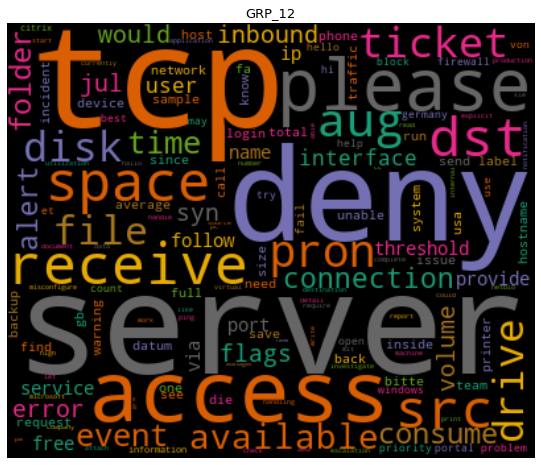

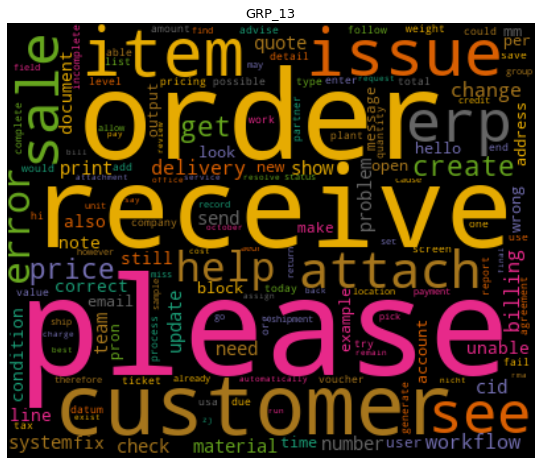

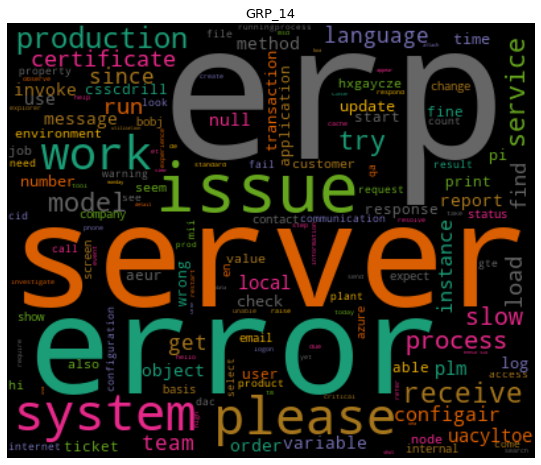

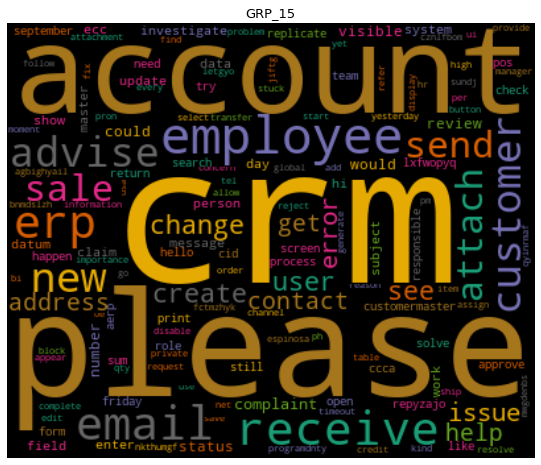

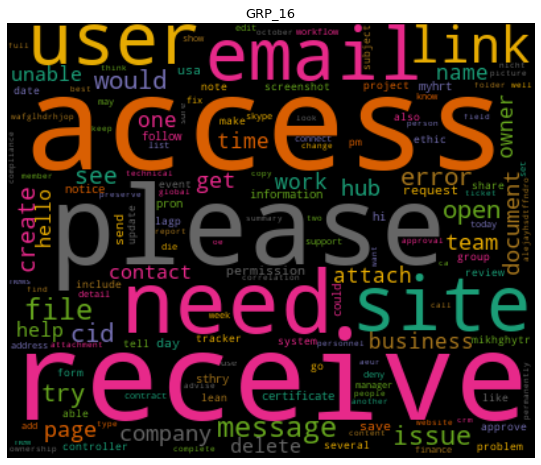

ZeroDivisionError: ignored

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm = df_dtm.transpose()


# Plotting word cloud for each group
for index, group in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[group].sort_values(ascending=False), group)

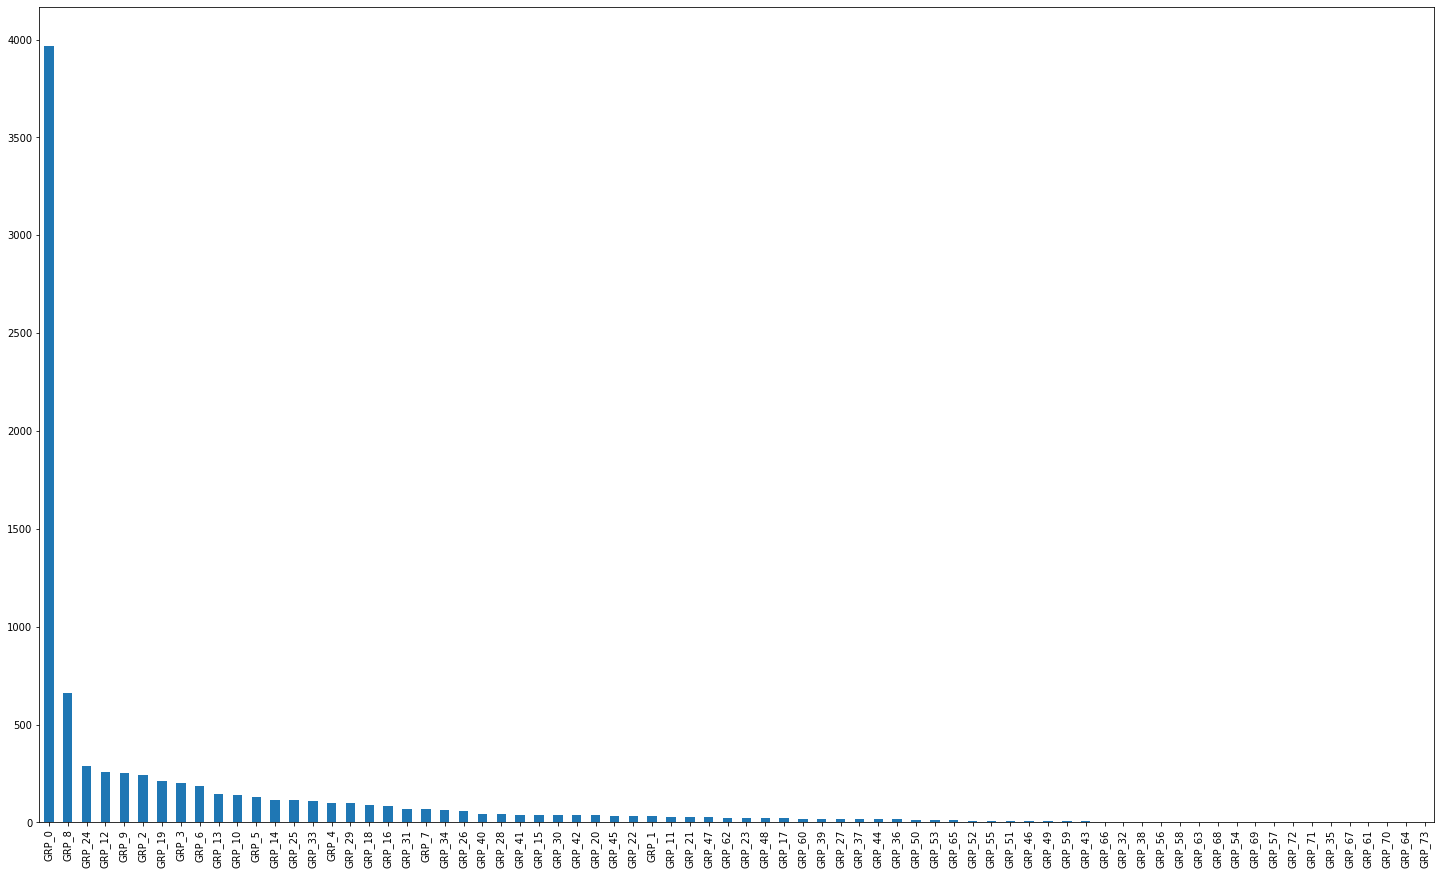

In [ ]:
#Lets check how balance our classification is

dfn['Assignment group'].value_counts().plot(kind='bar', figsize=(25,15));

We can see how unbalanced our dataset is. We will try to make use of NLP data augmentation techniques.

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Easy data augmentation techniques for text classification

import random
from random import shuffle
random.seed(1)

# stop words list

stop_words = [
    'i',
    'me',
    'my',
    'myself',
    'we',
    'our',
    'ours',
    'ourselves',
    'you',
    'your',
    'yours',
    'yourself',
    'yourselves',
    'he',
    'him',
    'his',
    'himself',
    'she',
    'her',
    'hers',
    'herself',
    'it',
    'its',
    'itself',
    'they',
    'them',
    'their',
    'theirs',
    'themselves',
    'what',
    'which',
    'who',
    'whom',
    'this',
    'that',
    'these',
    'those',
    'am',
    'is',
    'are',
    'was',
    'were',
    'be',
    'been',
    'being',
    'have',
    'has',
    'had',
    'having',
    'do',
    'does',
    'did',
    'doing',
    'a',
    'an',
    'the',
    'and',
    'but',
    'if',
    'or',
    'because',
    'as',
    'until',
    'while',
    'of',
    'at',
    'by',
    'for',
    'with',
    'about',
    'against',
    'between',
    'into',
    'through',
    'during',
    'before',
    'after',
    'above',
    'below',
    'to',
    'from',
    'up',
    'down',
    'in',
    'out',
    'on',
    'off',
    'over',
    'under',
    'again',
    'further',
    'then',
    'once',
    'here',
    'there',
    'when',
    'where',
    'why',
    'how',
    'all',
    'any',
    'both',
    'each',
    'few',
    'more',
    'most',
    'other',
    'some',
    'such',
    'no',
    'nor',
    'not',
    'only',
    'own',
    'same',
    'so',
    'than',
    'too',
    'very',
    's',
    't',
    'can',
    'will',
    'just',
    'don',
    'should',
    'now',
    '',
    ]

# cleaning up text

import re


def get_only_chars(line):

    clean_line = ''

    line = line.replace('\xe2\x80\x99', '')
    line = line.replace("'", '')
    line = line.replace('-', ' ')  # replace hyphens with spaces
    line = line.replace('\t', ' ')
    line = line.replace('\n', ' ')
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +', ' ', clean_line)  # delete extra spaces
    if len(clean_line) > 0 and clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line


########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet


def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word
                            not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [(synonym if word == random_word else word)
                         for word in new_words]

            # print("replaced", random_word, "with", synonym)

            num_replaced += 1
        if num_replaced >= n:  # only replace up to n words
            break

    # this is stupid but we need it, trust me

    sentence = ' '.join(new_words)
    new_words = sentence.split(' ')

    return new_words


def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonym = l.name().replace('_', ' ').replace('-', ' '
                    ).lower()
            synonym = ''.join([char for char in synonym if char
                              in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)


########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):

    # obviously, if there's only one word, don't delete it

    if len(words) == 1:
        return words

    # randomly delete words with probability p

    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    # if you end up deleting all words, just return a random word

    if len(new_words) == 0:
        rand_int = random.randint(0, len(words) - 1)
        return [words[rand_int]]

    return new_words


########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words


def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words) - 1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words) - 1)
        counter += 1
        if counter > 3:
            return new_words
    (new_words[random_idx_1], new_words[random_idx_2]) = \
        (new_words[random_idx_2], new_words[random_idx_1])
    return new_words


########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################

def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words


def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words) - 1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words) - 1)
    new_words.insert(random_idx, random_synonym)


########################################################################
# main data augmentation function
########################################################################

def eda(
    sentence,
    alpha_sr=0.1,
    alpha_ri=0.1,
    alpha_rs=0.1,
    p_rd=0.1,
    num_aug=9,
    ri=True,
    rd=True,
    ):

    sentence = get_only_chars(sentence)
    words = sentence.split(' ')
    words = [word for word in words if word is not '']
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = int(num_aug / 4) + 1
    n_sr = max(1, int(alpha_sr * num_words))
    n_ri = max(1, int(alpha_ri * num_words))
    n_rs = max(1, int(alpha_rs * num_words))

    # sr
    for _ in range(num_new_per_technique):
        a_words = synonym_replacement(words, n_sr)
        augmented_sentences.append(' '.join(a_words))

    # ri
    if ri:
        for _ in range(num_new_per_technique):
            a_words = random_insertion(words, n_ri)
            augmented_sentences.append(' '.join(a_words))

    # rs
    for _ in range(num_new_per_technique):
        a_words = random_swap(words, n_rs)
        augmented_sentences.append(' '.join(a_words))

    # rd
    if rd:
        for _ in range(num_new_per_technique):
            a_words = random_deletion(words, p_rd)
            augmented_sentences.append(' '.join(a_words))

    augmented_sentences = [get_only_chars(sentence) for sentence in
                           augmented_sentences]
    shuffle(augmented_sentences)

    # trim so that we have the desired number of augmented sentences
    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    else:
        keep_prob = num_aug / len(augmented_sentences)
        augmented_sentences = [s for s in augmented_sentences
                               if random.uniform(0, 1) < keep_prob]

    # append the original sentence
    augmented_sentences.append(sentence)

    return augmented_sentences

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#We dont need Description column anymore

dfn = dfn.drop(['Description'], axis=1)

In [ ]:
#Lets augment text for groups other than GRP_0

df_aug = pd.DataFrame(columns=dfn.columns)

for index, row in dfn.iterrows():
  if row['Assignment group'] != 'GRP_0':
      sentences = eda(row['lemmatized'])
      for sentence in sentences:
        df_aug = df_aug.append({'Assignment group': row['Assignment group'], 'lemmatized': sentence}, ignore_index=True)
df_aug.head()

,Assignment group,lemmatized
0,GRP_1,mountpoint critical value event threshold
1,GRP_1,event critical note value mountpoint threshold
2,GRP_1,event critical value mountpoint threshold
3,GRP_1,doorway event critical value mountpoint threshold
4,GRP_1,event critical value mountpoint threshold


In [ ]:
#Append df_aug to parent dataframe dfn

dfn = dfn.append(df_aug) 

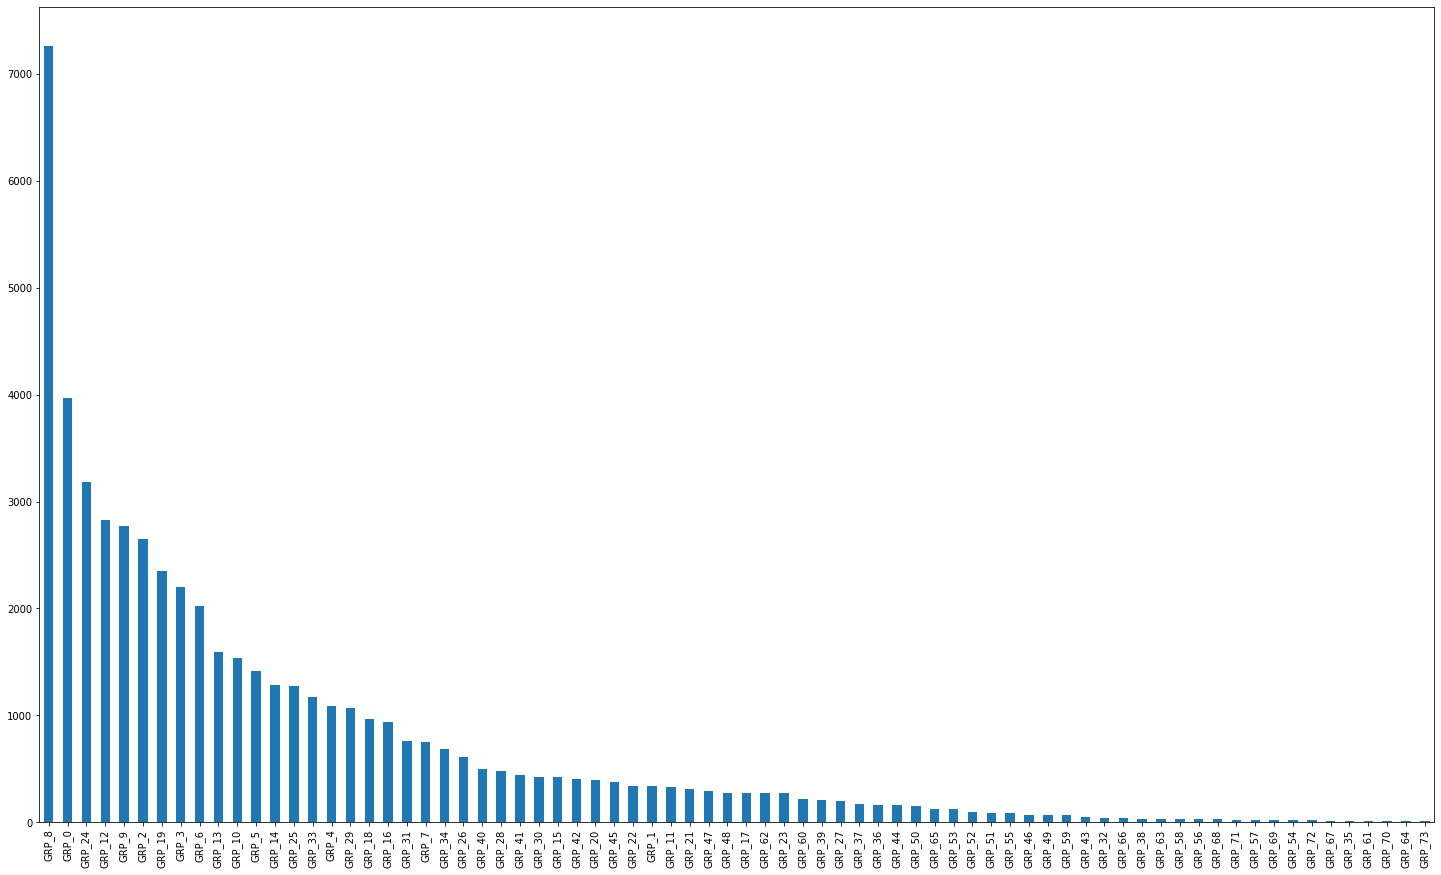

In [ ]:
#Lets check classification plot again

dfn['Assignment group'].value_counts().plot(kind='bar', figsize=(25,15));

In [ ]:
#Separate train and target columns

X = dfn.drop(['Assignment group'], axis=1)
y = dfn['Assignment group']

In [ ]:
#Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp36-none-any.whl
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.1.1 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing i

In [ ]:
pip install transformers

In [ ]:
import transformers

txt = "bank river"
## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
## bert model
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
## return hidden layer with embeddings
input_ids = np.array(tokenizer.encode(txt))[None,:]  
embedding = nlp(input_ids)
embedding[0][0]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[-0.34245902,  0.05200432, -0.2565384 , ..., -0.24441753,
         0.05279754,  0.4490059 ],
       [-0.38362536, -0.66715145, -0.3502131 , ..., -0.10210471,
        -0.21629386, -0.2929993 ],
       [-0.34996107, -0.08316974, -0.9876836 , ...,  0.06963302,
        -0.4945301 , -0.16088273],
       [ 0.7392347 ,  0.0739195 , -0.45680988, ..., -0.02415765,
        -0.7649665 , -0.28110698]], dtype=float32)>

In [ ]:
def getSegs(corpus):
  maxlen = 50

  ## add special tokens
  maxqnans = np.int((maxlen-20)/2)
  corpus_tokenized = ["[CLS] "+
              " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', 
              str(txt).lower().strip()))[:maxqnans])+
              " [SEP] " for txt in corpus]

  ## generate masks
  masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(
            txt.split(" "))) for txt in corpus_tokenized]
      
  ## padding
  txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
      
  ## generate idx
  idx = [tokenizer.encode(seq.split(" ")) for seq in txt2seq]
      
  ## generate segments
  segments = [] 
  for seq in txt2seq:
      temp, i = [], 0
      for token in seq.split(" "):
          temp.append(i)
          if token == "[SEP]":
              i += 1
      segments.append(temp)
      
  return idx, masks, segments

In [ ]:
#Lets create feature matrix for training set

corpus = X_train["lemmatized"]

idx, masks, segments = getSegs(corpus)
  
## feature matrix
X_train = [np.asarray(idx, dtype='int32'), 
           np.asarray(masks, dtype='int32'), 
           np.asarray(segments, dtype='int32')]

In [ ]:
#Do the same for test data

corpus = X_test["lemmatized"]

idx, masks, segments = getSegs(corpus)
  
## feature matrix
X_test = [np.asarray(idx, dtype='int32'), 
           np.asarray(masks, dtype='int32'), 
           np.asarray(segments, dtype='int32')]


In [ ]:
#Build the model

from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model

## inputs
idx = Input((50), dtype="int32", name="input_idx")
masks = Input((50), dtype="int32", name="input_masks")
segments = Input((50), dtype="int32", name="input_segments")

## pre-trained bert
nlp = transformers.TFBertModel.from_pretrained("bert-base-uncased")
bert_out, _ = nlp([idx, masks, segments])

## fine-tuning
x = GlobalAveragePooling1D()(bert_out)
x = Dense(64, activation="relu")(x)
y_out = Dense(len(np.unique(y_train)), activation='softmax')(x)

## compile
model = Model([idx, masks, segments], y_out)

for layer in model.layers[:4]:
    layer.trainable = False

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_segments (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_3 (TFBertModel)   ((None, 50, 768), (N 109482240   input_idx[0][0]                  
                                                                 input_masks[0][0]     

Glove Embedding ( This embedding matrix should be used in one of the classification and accuracy checked)

In [ ]:
EMBEDDING_FILE = 'glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings_glove[word] = embd


Word2Vec Embedding (This embedding matrix should be used in the same classification where Glove is checked)

In [ ]:
#Word2Vec
# import required methods from gensim package
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
 
# create temp file and save converted embedding into it
target_file = get_tmpfile('word2vec.6B.200d.txt')
glove2word2vec('glove.6B.200d.txt', target_file)

embeddings_index = dict()
f = open(target_file)
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
